In [1]:
# importação bibliotecas
import pandas as pd

In [2]:
# importação circuitos
df_circuits = pd.read_csv("C:\\Users\\jonat\\Downloads\\f1db_csv (1)\\circuits.csv")

df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [3]:
# seleção colunas necessárias
df_circuits = df_circuits[['circuitId', 'name']]

# renomeando uma coluna
df_circuits = df_circuits.rename(columns={'name': 'circuitName'})

# apresentação amostra dados
df_circuits.head()

,circuitId,circuitName
0,1,Albert Park Grand Prix Circuit
1,2,Sepang International Circuit
2,3,Bahrain International Circuit
3,4,Circuit de Barcelona-Catalunya
4,5,Istanbul Park


In [4]:
df_constructors = pd.read_csv("C:\\Users\\jonat\\Downloads\\f1db_csv (1)\\constructors.csv")

df_constructors = df_constructors.rename(columns={'name': 'constructorsName'})

df_constructors.head()

,constructorId,constructorRef,constructorsName,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [5]:
df_constructors = df_constructors[['constructorId', 'constructorsName']]

df_constructors.head()

,constructorId,constructorsName
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


In [6]:
df_drivers = pd.read_csv("C:\\Users\\jonat\\Downloads\\f1db_csv (1)\\drivers.csv")

df_drivers = df_drivers.rename(columns={'nationality': 'driverNationality', 'dob': 'birthDate'})

df_drivers.head()

,driverId,driverRef,number,code,forename,surname,birthDate,driverNationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
df_drivers = df_drivers[['driverId', 'code', 'forename', 'surname', 'birthDate', 'driverNationality']]

df_drivers.head()

,driverId,code,forename,surname,birthDate,driverNationality
0,1,HAM,Lewis,Hamilton,1985-01-07,British
1,2,HEI,Nick,Heidfeld,1977-05-10,German
2,3,ROS,Nico,Rosberg,1985-06-27,German
3,4,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [8]:
df_drivers['nome_completo'] = df_drivers['forename'] + ' ' + df_drivers['surname']

df_drivers.head()

,driverId,code,forename,surname,birthDate,driverNationality,nome_completo
0,1,HAM,Lewis,Hamilton,1985-01-07,British,Lewis Hamilton
1,2,HEI,Nick,Heidfeld,1977-05-10,German,Nick Heidfeld
2,3,ROS,Nico,Rosberg,1985-06-27,German,Nico Rosberg
3,4,ALO,Fernando,Alonso,1981-07-29,Spanish,Fernando Alonso
4,5,KOV,Heikki,Kovalainen,1981-10-19,Finnish,Heikki Kovalainen


In [9]:
from datetime import datetime, date

# function para calcular a idade com base na data de nascimento
def calcular_idade(data_nascimento):
    try:
        data_nasc = datetime.strptime(data_nascimento, "%Y-%m-%d").date()
        hoje = date.today()
        idade = hoje.year - data_nasc.year - ((hoje.month, hoje.day) < (data_nasc.month, data_nasc.day))
        return idade
    except (ValueError, TypeError):
        return None
    
df_drivers['idade'] = df_drivers['birthDate'].apply(calcular_idade)

df_drivers.head()

,driverId,code,forename,surname,birthDate,driverNationality,nome_completo,idade
0,1,HAM,Lewis,Hamilton,1985-01-07,British,Lewis Hamilton,39.0
1,2,HEI,Nick,Heidfeld,1977-05-10,German,Nick Heidfeld,47.0
2,3,ROS,Nico,Rosberg,1985-06-27,German,Nico Rosberg,39.0
3,4,ALO,Fernando,Alonso,1981-07-29,Spanish,Fernando Alonso,43.0
4,5,KOV,Heikki,Kovalainen,1981-10-19,Finnish,Heikki Kovalainen,42.0


In [10]:
df_status = pd.read_csv("C:\\Users\\jonat\\Downloads\\f1db_csv (1)\\status.csv")

df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [11]:
df_races = pd.read_csv("C:\\Users\\jonat\\Downloads\\f1db_csv (1)\\races.csv")

df_races = df_races.rename(columns={'name': 'raceName', 'year':'raceYear', 'date':'raceDate'})

df_races.head()

,raceId,raceYear,round,circuitId,raceName,raceDate,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [12]:
df_races = df_races[['raceId', 'raceYear', 'circuitId', 'raceName', 'raceDate']]

df_races.head()

,raceId,raceYear,circuitId,raceName,raceDate
0,1,2009,1,Australian Grand Prix,2009-03-29
1,2,2009,2,Malaysian Grand Prix,2009-04-05
2,3,2009,17,Chinese Grand Prix,2009-04-19
3,4,2009,3,Bahrain Grand Prix,2009-04-26
4,5,2009,4,Spanish Grand Prix,2009-05-10


In [13]:
df_results = pd.read_csv("C:\\Users\\jonat\\Downloads\\f1db_csv (1)\\results.csv")

df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [14]:
df_results = df_results[['resultId', 'raceId', 'driverId', 'constructorId', 'statusId', 'grid', 'position', 'points', 'rank']]

df_results.head()

,resultId,raceId,driverId,constructorId,statusId,grid,position,points,rank
0,1,18,1,1,1,1,1,10.0,2
1,2,18,2,2,1,5,2,8.0,3
2,3,18,3,3,1,7,3,6.0,5
3,4,18,4,4,1,11,4,5.0,7
4,5,18,5,1,1,3,5,4.0,1


In [15]:
df_constructors.head()

,constructorId,constructorsName
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


In [16]:
# juntando vários dataframes para ter uma tabela única

df_results = pd.merge(df_results, df_races, on='raceId', how='left')
df_results = pd.merge(df_results, df_drivers, on='driverId', how='left')
df_results = pd.merge(df_results, df_constructors, on='constructorId', how='left')
df_results = pd.merge(df_results, df_status, on='statusId', how='left')

df_results.head()

,resultId,raceId,driverId,constructorId,statusId,grid,position,points,rank,raceYear,...,raceDate,code,forename,surname,birthDate,driverNationality,nome_completo,idade,constructorsName,status
0,1,18,1,1,1,1,1,10.0,2,2008,...,2008-03-16,HAM,Lewis,Hamilton,1985-01-07,British,Lewis Hamilton,39.0,McLaren,Finished
1,2,18,2,2,1,5,2,8.0,3,2008,...,2008-03-16,HEI,Nick,Heidfeld,1977-05-10,German,Nick Heidfeld,47.0,BMW Sauber,Finished
2,3,18,3,3,1,7,3,6.0,5,2008,...,2008-03-16,ROS,Nico,Rosberg,1985-06-27,German,Nico Rosberg,39.0,Williams,Finished
3,4,18,4,4,1,11,4,5.0,7,2008,...,2008-03-16,ALO,Fernando,Alonso,1981-07-29,Spanish,Fernando Alonso,43.0,Renault,Finished
4,5,18,5,1,1,3,5,4.0,1,2008,...,2008-03-16,KOV,Heikki,Kovalainen,1981-10-19,Finnish,Heikki Kovalainen,42.0,McLaren,Finished


In [17]:
df_results = df_results[['resultId', 'raceName', 'nome_completo', 'constructorsName', 'status', 'grid', 'position', 'points', 'rank', 'raceYear', 'raceDate', 'idade']]

df_results.head()

,resultId,raceName,nome_completo,constructorsName,status,grid,position,points,rank,raceYear,raceDate,idade
0,1,Australian Grand Prix,Lewis Hamilton,McLaren,Finished,1,1,10.0,2,2008,2008-03-16,39.0
1,2,Australian Grand Prix,Nick Heidfeld,BMW Sauber,Finished,5,2,8.0,3,2008,2008-03-16,47.0
2,3,Australian Grand Prix,Nico Rosberg,Williams,Finished,7,3,6.0,5,2008,2008-03-16,39.0
3,4,Australian Grand Prix,Fernando Alonso,Renault,Finished,11,4,5.0,7,2008,2008-03-16,43.0
4,5,Australian Grand Prix,Heikki Kovalainen,McLaren,Finished,3,5,4.0,1,2008,2008-03-16,42.0


In [18]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26320 entries, 0 to 26319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resultId          26320 non-null  int64  
 1   raceName          26320 non-null  object 
 2   nome_completo     26320 non-null  object 
 3   constructorsName  26320 non-null  object 
 4   status            26320 non-null  object 
 5   grid              26320 non-null  int64  
 6   position          26320 non-null  object 
 7   points            26320 non-null  float64
 8   rank              26320 non-null  object 
 9   raceYear          26320 non-null  int64  
 10  raceDate          26320 non-null  object 
 11  idade             26319 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.6+ MB


In [19]:
# verifica valores nulos
df_results.isnull().sum()

resultId            0
raceName            0
nome_completo       0
constructorsName    0
status              0
grid                0
position            0
points              0
rank                0
raceYear            0
raceDate            0
idade               1
dtype: int64

In [20]:
# converte algumas colunas para o tipo de dado correto

df_results['rank'] = pd.to_numeric(df_results['rank'], errors='coerce')

df_results['position'] = pd.to_numeric(df_results['position'], errors='coerce')

df_results['raceDate'] = pd.to_datetime(df_results['raceDate'], errors='coerce')

df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26320 entries, 0 to 26319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   resultId          26320 non-null  int64         
 1   raceName          26320 non-null  object        
 2   nome_completo     26320 non-null  object        
 3   constructorsName  26320 non-null  object        
 4   status            26320 non-null  object        
 5   grid              26320 non-null  int64         
 6   position          15413 non-null  float64       
 7   points            26320 non-null  float64       
 8   rank              8071 non-null   float64       
 9   raceYear          26320 non-null  int64         
 10  raceDate          26320 non-null  datetime64[ns]
 11  idade             26319 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 2.6+ MB


In [21]:
df_results.head()

,resultId,raceName,nome_completo,constructorsName,status,grid,position,points,rank,raceYear,raceDate,idade
0,1,Australian Grand Prix,Lewis Hamilton,McLaren,Finished,1,1.0,10.0,2.0,2008,2008-03-16,39.0
1,2,Australian Grand Prix,Nick Heidfeld,BMW Sauber,Finished,5,2.0,8.0,3.0,2008,2008-03-16,47.0
2,3,Australian Grand Prix,Nico Rosberg,Williams,Finished,7,3.0,6.0,5.0,2008,2008-03-16,39.0
3,4,Australian Grand Prix,Fernando Alonso,Renault,Finished,11,4.0,5.0,7.0,2008,2008-03-16,43.0
4,5,Australian Grand Prix,Heikki Kovalainen,McLaren,Finished,3,5.0,4.0,1.0,2008,2008-03-16,42.0


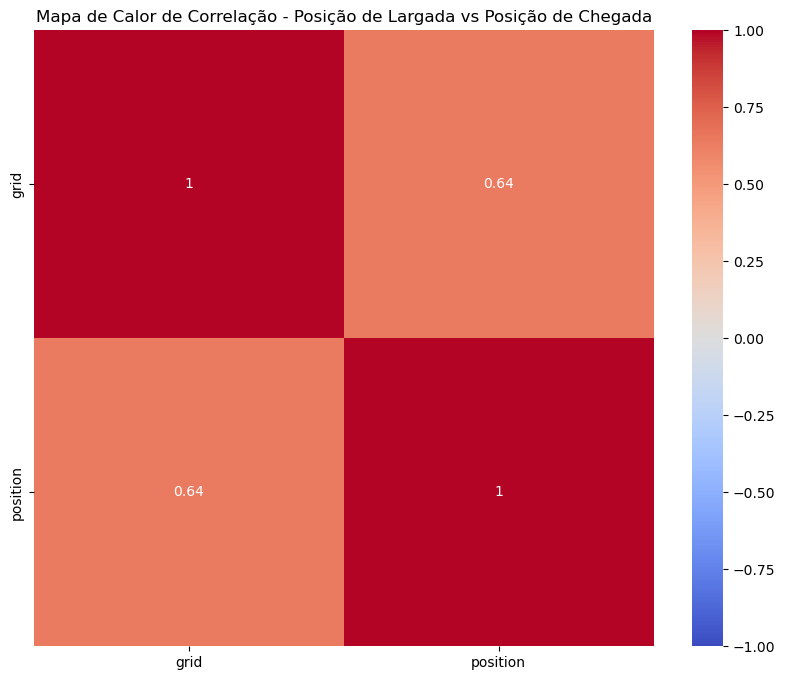

In [22]:
# apresenta a correlação entre a posição de largada e a posição de chegada
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_results[['grid', 'position']]
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlação - Posição de Largada vs Posição de Chegada')
plt.show()

In [23]:
# calcula o total de vitórias por piloto
vitorias_por_piloto = df_results[df_results['position'] == 1].groupby('nome_completo').size().reset_index(name='total_vitorias')
vitorias_por_piloto = vitorias_por_piloto.sort_values(by='total_vitorias', ascending=False)
print("Total de vitórias por piloto:")
print(vitorias_por_piloto)

Total de vitórias por piloto:
          nome_completo  total_vitorias
65       Lewis Hamilton             103
74   Michael Schumacher              91
73       Max Verstappen              56
104    Sebastian Vettel              53
0           Alain Prost              51
..                  ...             ...
28   Giancarlo Baghetti               1
26       George Russell               1
25      François Cevert               1
22         Esteban Ocon               1
83        Olivier Panis               1

[113 rows x 2 columns]


In [24]:
# calcula o total de vitórias por construtores
vitorias_por_construtor = df_results[df_results['position'] == 1].groupby('constructorsName').size().reset_index(name='total_vitorias')
vitorias_por_construtor = vitorias_por_construtor.sort_values(by='total_vitorias', ascending=False)
print("\nTotal de vitórias por construtores:")
print(vitorias_por_construtor)


Total de vitórias por construtores:
   constructorsName  total_vitorias
16          Ferrari             244
30          McLaren             179
32         Mercedes             125
36         Red Bull             115
45         Williams             114
40       Team Lotus              45
37          Renault              35
5          Benetton              27
6           Brabham              23
42          Tyrrell              23
25     Lotus-Climax              22
4               BRM              17
12    Cooper-Climax              12
26       Lotus-Ford              11
0        Alfa Romeo              11
43          Vanwall              10
29       Matra-Ford               9
22           Ligier               9
28         Maserati               9
10            Brawn               8
9     Brabham-Repco               8
20     Kurtis Kraft               5
31     McLaren-Ford               4
19           Jordan               4
44           Watson               3
27            March        

In [25]:
# média de pontos por temporada e por piloto

media_pontos_por_temporada_piloto = df_results.groupby(['raceYear', 'nome_completo'])['points'].mean().reset_index(name='media_pontos')
media_pontos_por_temporada_piloto = media_pontos_por_temporada_piloto.sort_values(by='media_pontos', ascending=False)
print("\nMédia de pontos por temporada e por piloto:")
print(media_pontos_por_temporada_piloto)


Média de pontos por temporada e por piloto:
      raceYear     nome_completo  media_pontos
3200      2024    Max Verstappen     25.500000
3179      2023    Max Verstappen     24.090909
3112      2020    Lewis Hamilton     21.687500
2961      2013  Sebastian Vettel     20.894737
2910      2011  Sebastian Vettel     20.631579
...        ...               ...           ...
1152      1963   Neville Lederle      0.000000
1153      1963      Paddy Driver      0.000000
1154      1963   Pedro Rodríguez      0.000000
1155      1963    Peter Arundell      0.000000
3207      2024      Yuki Tsunoda      0.000000

[3208 rows x 3 columns]


In [26]:
# função para determinar o vencedor entre pilotos da mesma equipe, é comparado corrida a corrida por temporada
# e quem possuir mais vitórias ou terminar a frente do companheiro mais vezes é o vencedor.

def determinar_vencedor(grupo):
    grupo = grupo.sort_values(by='position', na_position='last')
    vencedor = grupo.iloc[0]['nome_completo']
    return vencedor

# comparamos apenas a temporada 2021
df_filtrado = df_results[(df_results['raceYear'] == 2021)]

confrontos_por_temporada = df_filtrado.groupby(['raceYear', 'raceName', 'constructorsName']).apply(determinar_vencedor).reset_index(name='vencedor')

# Conta o total de vitórias por piloto
confrontos_ganhos = confrontos_por_temporada.groupby(['raceYear', 'constructorsName', 'vencedor']).size().reset_index(name='total_vitorias')

confrontos_ganhos = confrontos_ganhos.sort_values(by=['raceYear', 'constructorsName', 'total_vitorias'], ascending=[True, True, False])

print("\nConfrontos ganhos entre pilotos da mesma equipe por temporada:")
print(confrontos_ganhos)


Confrontos ganhos entre pilotos da mesma equipe por temporada:
    raceYear constructorsName            vencedor  total_vitorias
0       2021       Alfa Romeo  Antonio Giovinazzi              12
1       2021       Alfa Romeo      Kimi Räikkönen              10
2       2021       AlphaTauri        Pierre Gasly              17
3       2021       AlphaTauri        Yuki Tsunoda               5
5       2021   Alpine F1 Team     Fernando Alonso              12
4       2021   Alpine F1 Team        Esteban Ocon              10
6       2021     Aston Martin        Lance Stroll              13
7       2021     Aston Martin    Sebastian Vettel               9
9       2021          Ferrari     Charles Leclerc              14
8       2021          Ferrari        Carlos Sainz               8
10      2021     Haas F1 Team     Mick Schumacher              16
11      2021     Haas F1 Team      Nikita Mazepin               6
13      2021          McLaren        Lando Norris              15
12      2021